In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Définir un style plus professionnel
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
# Charger les données
df = pd.read_csv("../data/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Analyse exploratoire du dataset sur le diabète

## Aperçu des données

Le dataset contient des informations biométriques et comportementales sur 100 000 individus. Voici les principales colonnes du dataset :

| Colonne                        | Description                                         |
|-------------------------------|-----------------------------------------------------|
| gender                         | Sexe (Female/Male)                                  |
| age                            | Âge de l'individu                                   |
| hypertension                   | Hypertension (0 = Non, 1 = Oui)                     |
| heart_disease                  | Antécédents de maladie cardiaque (0 = Non, 1 = Oui) |
| smoking_history                | Historique de tabagisme (Never/Former/Current/No Info) |
| bmi                            | Indice de Masse Corporelle (BMI)                    |
| HbA1c_level                    | Taux d'HbA1c (glycémie sur 3 mois)                   |
| blood_glucose_level            | Glycémie à jeun                                      |
| diabetes                       | Présence de diabète (0 = Non, 1 = Oui)              |

## Dimensions du dataset

```python
df.shape
# (100000, 9)


In [57]:
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Analyse des Statistiques Descriptives

L'analyse des statistiques descriptives des différentes variables montre des informations intéressantes concernant la population étudiée.

- **Âge** : L'âge moyen des individus est de 41,89 ans, avec un écart-type relativement élevé (22,52), ce qui suggère une grande diversité d'âges dans l'échantillon, allant de 0,08 an à 80 ans. Toutefois, la présence d'une valeur minimale de 0,08 an soulève une question, car cette donnée semble suspecte et pourrait indiquer une erreur de saisie ou une valeur aberrante. Il est donc important de prêter attention à cette anomalie et de vérifier si cette valeur est correcte ou si elle nécessite un traitement spécifique (par exemple, la suppression ou la correction) avant de procéder à l'analyse.

- **Hypertension** : Seulement 7,5 % des individus présentent cette condition, tandis que 3,9 % des participants ont des antécédents de maladie cardiaque. Ces deux conditions semblent relativement peu fréquentes dans cet échantillon, ce qui suggère que la majorité des participants ne présentent pas de problèmes cardiovasculaires majeurs.

- **Indice de Masse Corporelle (IMC)** : L'IMC moyen est de 27,32, indiquant une population légèrement en surpoids en moyenne. Cependant, l'écart-type élevé (6,64) et les valeurs extrêmes observées, notamment un IMC allant de 10,01 à 95,69, suggèrent la présence de valeurs aberrantes. Il serait utile de vérifier ces valeurs extrêmes, car elles pourraient être dues à des erreurs de saisie ou à des cas cliniques rares mais extrêmes.

- **HbA1c** : Le taux moyen d'HbA1c est de 5,53, ce qui est dans la norme pour une population générale. Cependant, avec un écart-type de 1,07, il existe une variation modérée des niveaux, ce qui est attendu, mais les valeurs très élevées (jusqu'à 9) pourraient indiquer des personnes ayant un diabète mal contrôlé.

- **Glycémie à jeun** : La moyenne de la glycémie à jeun est de 138,06 mg/dL, ce qui est relativement élevé et peut être indicatif de la prévalence de pré-diabète ou de diabète dans cette population. L'écart-type de 40,71 montre une grande dispersion des valeurs, allant de 80 mg/dL à 300 mg/dL. La valeur maximale de 300 mg/dL semble élevée et pourrait correspondre un cas extrême de diabète non contrôlé.

- **Diabète** : La proportion de personnes atteintes de diabète dans cet échantillon est de 8,5 %, un taux relativement faible mais non négligeable. Cela montre que, bien que le diabète ne soit pas très répandu dans cette population, il représente tout de même une préoccupation de santé publique.

## Conclusion

Ces statistiques fournissent un aperçu utile de la répartition des âges, de la santé cardiovasculaire, de l'IMC et du diabète dans la population étudiée. Cependant, elles mettent également en évidence des valeurs aberrantes, notamment pour l'âge, l'IMC et la glycémie à jeun, qui nécessitent une attention particulière. Il est essentiel de vérifier et, si nécessaire, de traiter ces anomalies avant de procéder à des analyses plus approfondies. Ces observations montrent des variations importantes dans les données et soulignent l'importance de traiter les valeurs extrêmes et de comprendre leurs causes possibles avant de tirer des conclusions définitives.


In [58]:
df.duplicated().sum()

3854

In [59]:
df.drop_duplicates(inplace = True)

In [60]:
df.duplicated().sum()

0

## Vérification et suppression des doublons

Les doublons peuvent fausser les statistiques, biaiser les résultats, et entraîner de mauvaises décisions basées sur des données redondantes.

Nous allons :
- Vérifier la présence de lignes dupliquées.
- Supprimer ces doublons si nécessaire.




## Analyse des valeurs aberrantes

Certaines colonnes présentent des valeurs potentiellement aberrantes qu’il est important de détecter et de traiter.

### 🔍 `age`

### 🔍 `bmi` (Indice de masse corporelle)

### 🔍 `HbA1c_level` (hémoglobine glyquée)



✅ **Étapes suivantes** :
- Visualiser les distributions (ex. : boxplots, histogrammes).
- Isoler les lignes contenant ces valeurs extrêmes.
- Décider de leur traitement : suppression, correction ou maintien selon leur validité.

In [61]:
# Vérifier les valeurs aberrantes (ici, âge < 1 an)
valeurs_aberrantes_age = df[df['age'] < 1]
# 2. Supprimer ces valeurs aberrantes
df_cleaned = df[df['age'] >= 1].copy()
print(f"\nNombre de lignes supprimées : {len(df) - len(df_cleaned)}")



Nombre de lignes supprimées : 910


Nombre de valeurs supprimées : 318


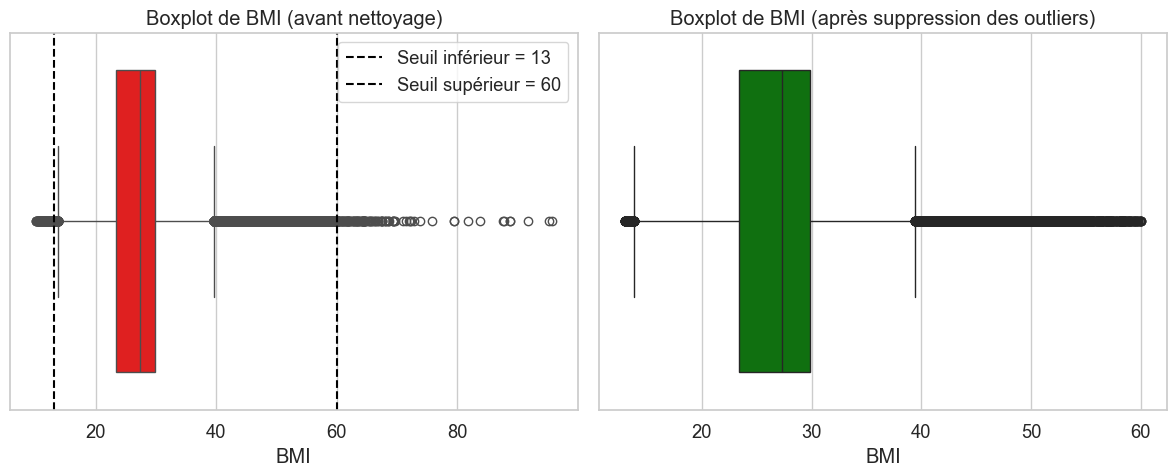

In [62]:
# 1. Détection des outliers avec IQR
q1_bmi = df['bmi'].quantile(0.25)
q3_bmi = df['bmi'].quantile(0.75)
iqr_bmi = q3_bmi - q1_bmi
bornes_outliers_bmi = (q1_bmi - 1.5 * iqr_bmi, q3_bmi + 1.5 * iqr_bmi)

# Nombre d'outliers avant nettoyage
outliers_bmi_avant = df[(df['bmi'] < bornes_outliers_bmi[0]) | (df['bmi'] > bornes_outliers_bmi[1])]

# 2. Suppression des valeurs aberrantes dans bmi
df_cleaned = df[(df['bmi'] >= 13) & (df['bmi'] <= 60)].copy()

# Nombre d'outliers après nettoyage
outliers_bmi_apres = df_cleaned[(df_cleaned['bmi'] < bornes_outliers_bmi[0]) | (df_cleaned['bmi'] > bornes_outliers_bmi[1])]

nb_valeurs_supprimees = len(outliers_bmi_avant) - len(outliers_bmi_apres)
print(f"Nombre de valeurs supprimées : {nb_valeurs_supprimees}")

# 3. Visualiser avant et après suppression des outliers

plt.figure(figsize=(12, 5))

# Avant nettoyage (boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'], color='red')
plt.axvline(13, color='black', linestyle='--', label='Seuil inférieur = 13')
plt.axvline(60, color='black', linestyle='--', label='Seuil supérieur = 60')
plt.title("Boxplot de BMI (avant nettoyage)")
plt.xlabel("BMI")
plt.legend()

# Après nettoyage (boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['bmi'], color='green')
plt.title("Boxplot de BMI (après suppression des outliers)")
plt.xlabel("BMI")

plt.tight_layout()
plt.show()


Nombre de valeurs supprimées : 9290


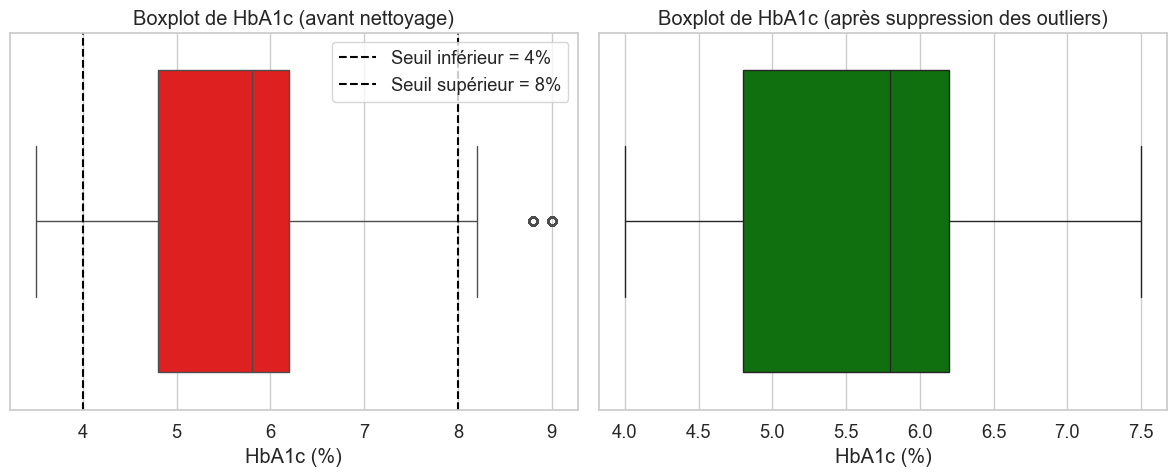

In [63]:
# 1. Détection des outliers avec seuils
df_cleaned = df[(df['HbA1c_level'] >= 4) & (df['HbA1c_level'] <= 8)].copy()

# Nombre de valeurs supprimées
nb_valeurs_supprimees = len(df) - len(df_cleaned)
print(f"Nombre de valeurs supprimées : {nb_valeurs_supprimees}")

# Visualisation avant et après nettoyage (Boxplot)
plt.figure(figsize=(12, 5))

# Avant nettoyage (boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x=df['HbA1c_level'], color='red')
plt.axvline(4, color='black', linestyle='--', label='Seuil inférieur = 4%')
plt.axvline(8, color='black', linestyle='--', label='Seuil supérieur = 8%')
plt.title("Boxplot de HbA1c (avant nettoyage)")
plt.xlabel("HbA1c (%)")
plt.legend()

# Après nettoyage (boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['HbA1c_level'], color='green')
plt.title("Boxplot de HbA1c (après suppression des outliers)")
plt.xlabel("HbA1c (%)")

plt.tight_layout()
plt.show()

### Détails de la suppression :

- **Lignes supprimées** : 14 372

Les données restantes sont désormais plus fiables et prêtes à être utilisées pour la suite de l'analyse.



In [64]:
no_info_count = df[df['smoking_history'] == 'No Info'].shape[0]
# Afficher le résultat
print(f"Le nombre de lignes avec 'No Info' dans smoking_history est : {no_info_count}")

Le nombre de lignes avec 'No Info' dans smoking_history est : 32887


In [65]:
# Définir l'ordre des catégories pour la colonne smoking_history
smoking_history_order = ['never', 'former', 'current', 'no info']

# Créer un dictionnaire de mapping pour l'encodage ordinal
smoking_history_mapping = {category: idx for idx, category in enumerate(smoking_history_order)}

# Nettoyer la colonne smoking_history (stripping et lowercasing)
df_cleaned['smoking_history'] = df['smoking_history'].str.strip().str.lower()

# Appliquer le mapping à la colonne smoking_history
df_cleaned['smoking_history_encoded'] = df_cleaned['smoking_history'].map(smoking_history_mapping)


# Si l'encodage est correct, supprimer l'ancienne colonne 'smoking_history'
df_cleaned = df_cleaned.drop(columns=['smoking_history'])





## Observation sur les valeurs 'no info' dans `smoking_history`

Nous avons constaté qu'un nombre non négligeable d'entrées dans la colonne **`smoking_history`** contiennent la valeur `'no info'`, ce qui pourrait poser un problème lors de l'entraînement du modèle. En effet, la présence de valeurs manquantes ou inconnues peut induire une distorsion des résultats. Cependant, étant donné que cette catégorie représente environ un **tiers** de l'ensemble des données, il serait contre-productif de supprimer ces lignes, car cela entraînerait une perte importante d'informations.

### Justification de la solution :
Nous avons donc choisi de **créer une catégorie distincte** pour `'no info'` afin de conserver toutes les données tout en permettant au modèle de prendre en compte cette catégorie comme une variable spécifique. Cette approche permet de traiter l'absence d'information de manière explicite, tout en évitant de perdre des données précieuses.

En d'autres termes, plutôt que de supprimer ces valeurs ou de les imputer, nous avons décidé de les traiter comme une **catégorie à part entière**, en la remplaçant par la valeur `'unknown'`. Cela permet au modèle de gérer cette absence d'information sans que cela n'affecte négativement les autres catégories de la colonne.

## Pourquoi ai-je encodé les catégories en valeurs numériques ?

Dans le cadre de l'apprentissage automatique, les algorithmes fonctionnent généralement mieux avec des données numériques plutôt qu'avec des données catégorielles sous forme de texte. L'**encodage ordinal** est une méthode permettant de convertir des catégories en nombres tout en préservant un ordre logique entre les différentes catégories.

### Pourquoi l'encodage ordinal ?
L'encodage ordinal est particulièrement adapté dans les cas où l'ordre des catégories a une importance, comme par exemple pour des variables telles que **`education_level`** ou **`income_level`**, où il existe une hiérarchie évidente. Dans le cas de **`smoking_history`**, cependant, un encodage **one-hot** pourrait aussi être envisagé, car il n'y a pas nécessairement d'ordre intrinsèque entre les catégories (par exemple, `'smokes'`, `'never smoked'`, `'unknown'`). Mais, dans un contexte général, l'encodage ordinal simplifie l'apprentissage pour certains modèles



In [66]:
# Remplacer les valeurs textuelles 'Female' et 'Male' par des valeurs binaires (0 et 1)
df_cleaned['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

## Transformation de la colonne `gender`

Dans ce projet, la colonne **`gender`** contient des valeurs catégorielles sous forme de texte (par exemple, `'Female'` et `'Male'`). Cependant, pour que ces données puissent être utilisées efficacement par les algorithmes d'apprentissage automatique, il est nécessaire de convertir ces catégories en valeurs numériques.


In [67]:
#Verification 
df_cleaned.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded
0,0,80.0,0,1,25.19,6.6,140,0,0.0
1,0,54.0,0,0,27.32,6.6,80,0,3.0
2,1,28.0,0,0,27.32,5.7,158,0,0.0
3,0,36.0,0,0,23.45,5.0,155,0,2.0
4,1,76.0,1,1,20.14,4.8,155,0,2.0


In [69]:
# Initialisation du normaliseur MinMax
scaler = StandardScaler()

# Normalisation des colonnes numériques, excepté 'gender' et 'smoking_history_encoded' (car déjà encodées)
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Appliquer la normalisation
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])

# Affichage des données normalisées
df_cleaned.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded
0,0,1.714718,0,1,-0.307920,1.163140,0.064453,0,0.0
1,0,0.556170,0,0,0.008368,1.163140,-1.433516,0,3.0
2,1,-0.602377,0,0,0.008368,0.080821,0.513843,0,0.0
3,0,-0.245901,0,0,-0.566296,-0.760982,0.438945,0,2.0
4,1,1.536480,1,1,-1.057804,-1.001498,0.438945,0,2.0


La normalisation est cruciale pour s'assurer que toutes les caractéristiques contribuent de manière égale dans les modèles d'apprentissage automatique. En utilisant **StandardScaler**, nous centrons les données autour de zéro et les ajustons à un écart-type de 1. Cela améliore la convergence des algorithmes et la stabilité numérique du modèle.


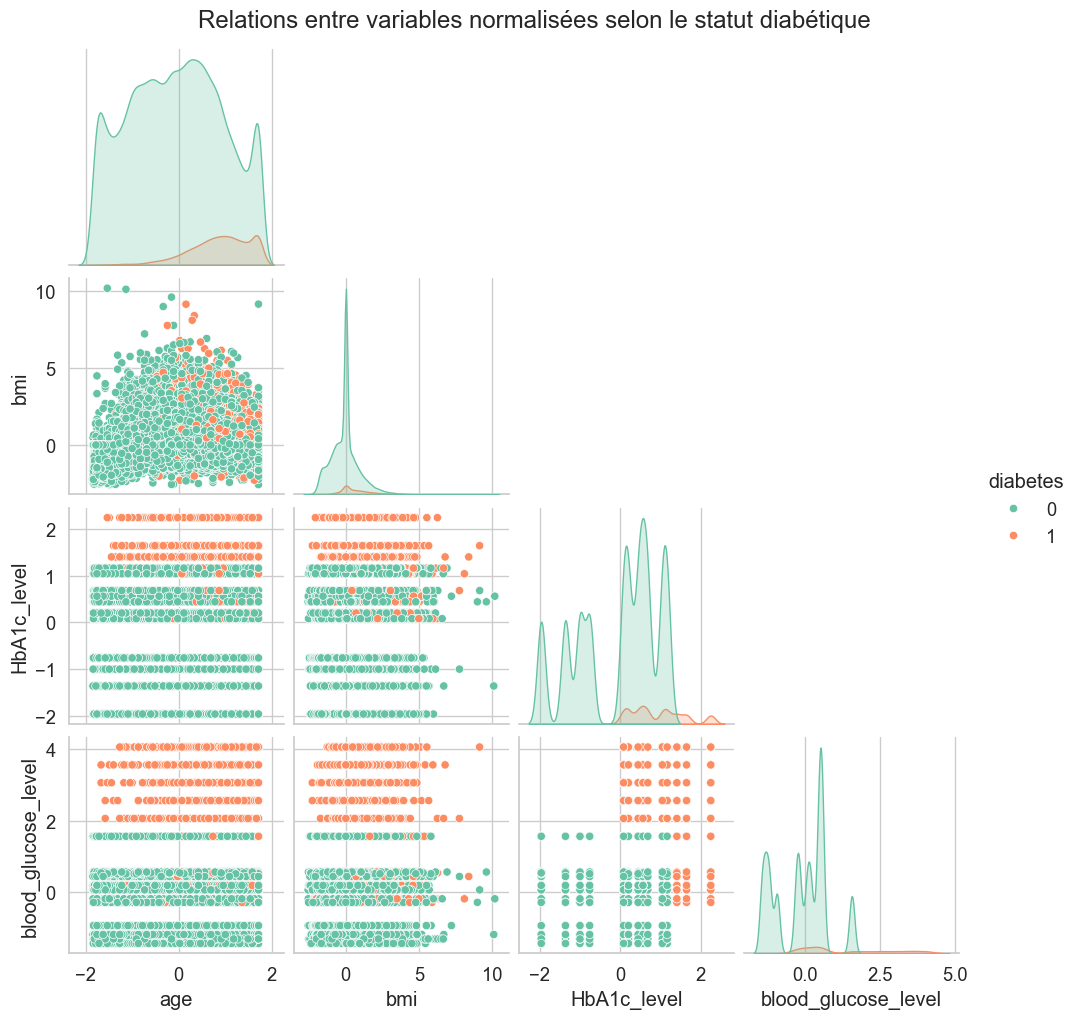

In [70]:
# Sélection des colonnes numériques à tracer
cols_to_plot = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Pairplot avec couleur selon la présence de diabète
sns.pairplot(df_cleaned[cols_to_plot], hue='diabetes', palette='Set2', corner=True)
plt.suptitle("Relations entre variables normalisées selon le statut diabétique", y=1.02)
plt.show()

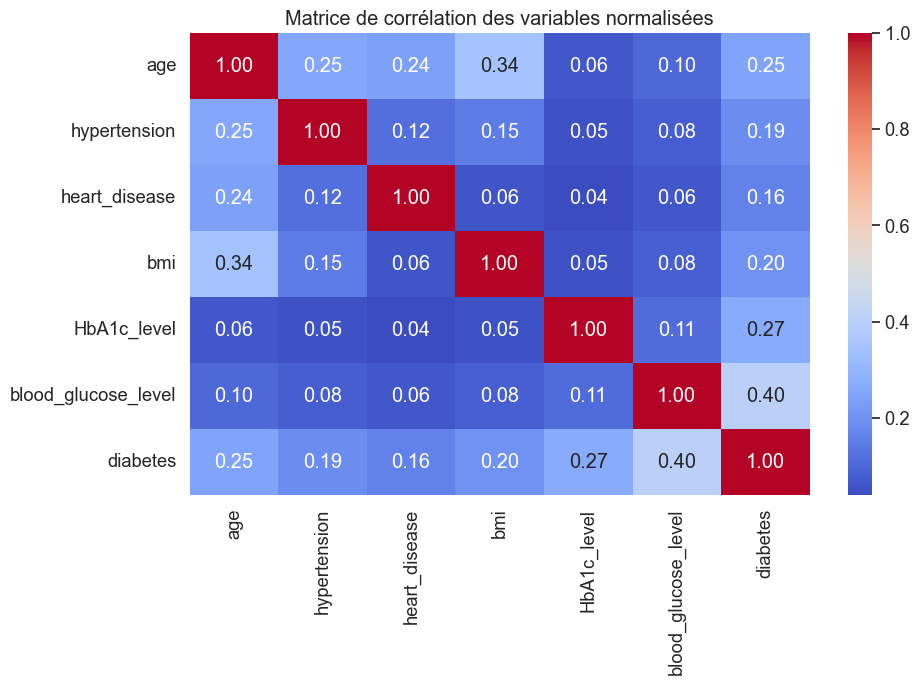

In [71]:
plt.figure(figsize=(10, 6))
corr_matrix = df_cleaned.drop(columns=['gender', 'smoking_history_encoded']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables normalisées")
plt.show()



### Enregistrer le fichier normalisé 

In [108]:
# Enregistrer le DataFrame dans un fichier CSV
df.to_csv('../data/data_normalized.csv', index=False)
